## Test Definitivo

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
features = ['PALO1', 'NUM1', 'PALO2', 'NUM2', 'PALO3', 'NUM3', 'PALO4', 'NUM4', 'PALO5', 'NUM5', 'HAND']
data=pd.read_csv('poker-hand-training-true.data', names=features)
data

,PALO1,NUM1,PALO2,NUM2,PALO3,NUM3,PALO4,NUM4,PALO5,NUM5,HAND
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [3]:
data_transform = pd.DataFrame(columns=['AS', 'DOS', 'TRES',
                                      'CUATRO', 'CINCO', 
                                      'SEIS', 'SIETE', 'OCHO', 
                                      'NUEVE', 'DIEZ', 'JOTA',
                                     'REINA', 'REY'])

data_transform['HAND']=data['HAND']
data_transform.iloc[:, 0:-1]=0
num_df = data.loc[:,['NUM1', 'NUM2', 'NUM3', 'NUM4', 'NUM5']]
data_transform

,AS,DOS,TRES,CUATRO,CINCO,SEIS,SIETE,OCHO,NUEVE,DIEZ,JOTA,REINA,REY,HAND
0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25006,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25007,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25008,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
for fila in range(data_transform.shape[0]):
    data_transform.iloc[fila, (num_df.iloc[fila, :] - 1).value_counts().index] = (num_df.iloc[fila, :] - 1).value_counts().values
    if (fila % 10_000) == 0:
        print(fila)

0
10000
20000


In [5]:
data_transform

,AS,DOS,TRES,CUATRO,CINCO,SEIS,SIETE,OCHO,NUEVE,DIEZ,JOTA,REINA,REY,HAND
0,1,0,0,0,0,0,0,0,0,1,1,1,1,9
1,1,0,0,0,0,0,0,0,0,1,1,1,1,9
2,1,0,0,0,0,0,0,0,0,1,1,1,1,9
3,1,0,0,0,0,0,0,0,0,1,1,1,1,9
4,1,0,0,0,0,0,0,0,0,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,0,0,0,1,0,1,0,0,1,0,1,1,0,0
25006,1,0,0,1,0,0,0,0,0,2,0,0,1,1
25007,2,0,0,1,0,0,0,0,0,1,0,0,1,1
25008,0,0,1,0,0,0,0,0,1,1,0,2,0,1


In [6]:
data_transform['SUIT']=data_transform['SUIT']=0
for fila in range(data_transform.shape[0]):
    if (data_transform['HAND'].iloc[fila]==5) | (data_transform['HAND'].iloc[fila]==8) | (data_transform['HAND'].iloc[fila]==9): 
        data_transform['SUIT'].iloc[fila]=1
data_transform

,AS,DOS,TRES,CUATRO,CINCO,SEIS,SIETE,OCHO,NUEVE,DIEZ,JOTA,REINA,REY,HAND,SUIT
0,1,0,0,0,0,0,0,0,0,1,1,1,1,9,1
1,1,0,0,0,0,0,0,0,0,1,1,1,1,9,1
2,1,0,0,0,0,0,0,0,0,1,1,1,1,9,1
3,1,0,0,0,0,0,0,0,0,1,1,1,1,9,1
4,1,0,0,0,0,0,0,0,0,1,1,1,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0
25006,1,0,0,1,0,0,0,0,0,2,0,0,1,1,0
25007,2,0,0,1,0,0,0,0,0,1,0,0,1,1,0
25008,0,0,1,0,0,0,0,0,1,1,0,2,0,1,0


In [7]:
data_transform = data_transform[['AS', 'DOS', 'TRES',
                                      'CUATRO', 'CINCO', 
                                      'SEIS', 'SIETE', 'OCHO', 
                                      'NUEVE', 'DIEZ', 'JOTA',
                                     'REINA', 'REY', 'SUIT','HAND']]
data_transform

,AS,DOS,TRES,CUATRO,CINCO,SEIS,SIETE,OCHO,NUEVE,DIEZ,JOTA,REINA,REY,SUIT,HAND
0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,9
1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,9
2,1,0,0,0,0,0,0,0,0,1,1,1,1,1,9
3,1,0,0,0,0,0,0,0,0,1,1,1,1,1,9
4,1,0,0,0,0,0,0,0,0,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0
25006,1,0,0,1,0,0,0,0,0,2,0,0,1,0,1
25007,2,0,0,1,0,0,0,0,0,1,0,0,1,0,1
25008,0,0,1,0,0,0,0,0,1,1,0,2,0,0,1


In [8]:
X = data_transform.iloc[:, 0:-1]
y = data_transform.iloc[:, -1:]

In [9]:
import keras
model = keras.models.load_model("my_keras_model4.h5")

In [10]:
y_pred=model.predict(X).argmax(axis=1)

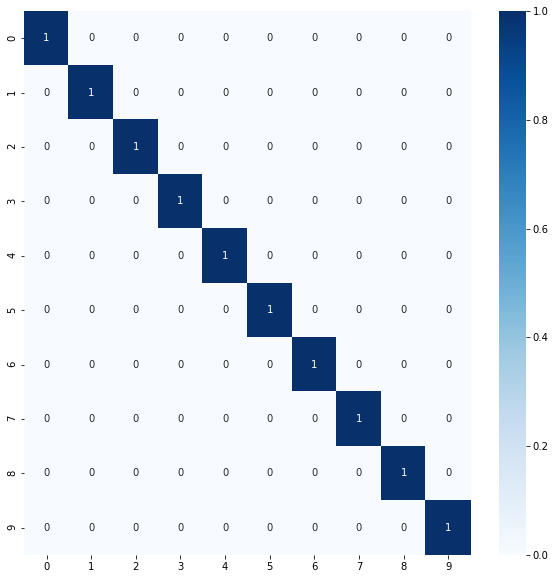

In [11]:
c_matrix = confusion_matrix(y, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(c_matrix, annot=True, 
            cmap='Blues', ax=ax); 